# 1D NMR Processing and Display

a simplified environment for processing 1D Bruker NMR datasets with `SPIKE`

Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).

Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.


## Initialization
the following cell should be run only once, at the beginning of the processing

In [1]:
# load all python and interactive tools
from __future__ import print_function, division
%matplotlib notebook
import os.path as op
import spike
from spike.Interactive import INTER as I
from spike.File.BrukerNMR import Import_1D
from IPython.display import display, HTML
display(HTML('<b>Program is Ready</b>'))


          SPIKE
    Version     : 0.99.6
    Date        : 12-04-2019
    Revision Id : 405
*** Importing  << zoom3D >> Failed ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  bokeh_display,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  tisane,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


### Choose the file

The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- The optional `base` argument, starts the exploration on a given location

In [2]:
FC = I.FileChooser(base='/DATA/pharma', filetype='fid')

After the selection, the selected filename is found in `FC.file`

In [3]:
FC.file

'/DATA/pharma/ARTEref_161123/1/fid'

### Import dataset

This is simply done with the `Import_1D()` tool, which returns a `SPIKE` object.

We store it into a variable, evaluating the variable show a summary of the dataset. 

Reading file  1


<IPython.core.display.Javascript object>


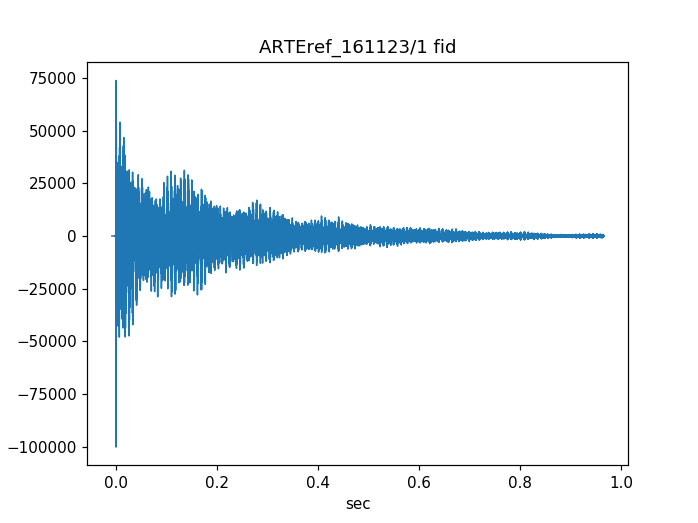

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  8192 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [5]:
print('Reading file ',FC.dirname)
d1 = Import_1D(FC.file)
d1.filename = FC.file
d1.set_unit('sec').display(title=FC.nmrname+" fid")
d1

In the current set-up, the figure can be explored *(zoom, shift, resize, etc)* with the jupyter tools displayed  below the dataset.
The figure can also be saved as a `png` graphic file.

At anytime, the figure can be frozen by clicking on the blue button on the upper right corner, just rerun the cell for changing it.

In [ ]:
d1.set_unit('sec').display()

## Basic Processing

many processing methods are available, they can be either applied one by one, or piped by chaining them.

### Fourier Transform

<IPython.core.display.Javascript object>


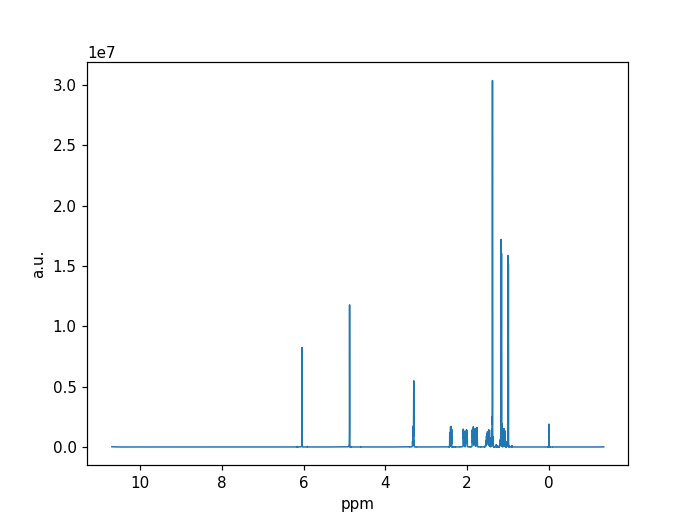

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  16384 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [6]:
D1 = d1.copy() # copy the imported data-set to another object for processing
D1.apod_em(0.3).zf(2).ft_sim().bk_corr().apmin()  # chaining  apodisation - zerofill - FT - Bruker correction - autophase
D1.set_unit('ppm').display()  # chain  set to ppm unit - and display

## Advanced processing

### *not finished - handle with care*

<IPython.core.display.Javascript object>


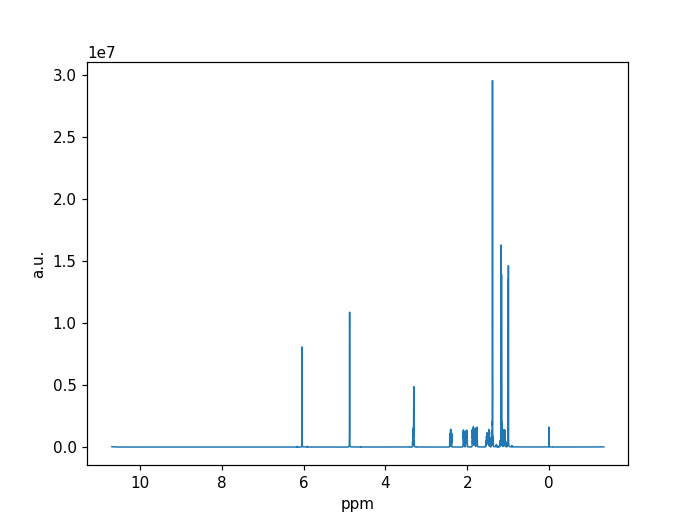

In [7]:
PD1 = I.AvProc1D(filename=FC.file)

### rephasing
might be required - an interactive phaser is available

Use `scale` and `zoom` to tune the display; then use `P0, P1, pivot` to optimize the phase.

Once finished, click on `Apply correction`

<IPython.core.display.Javascript object>


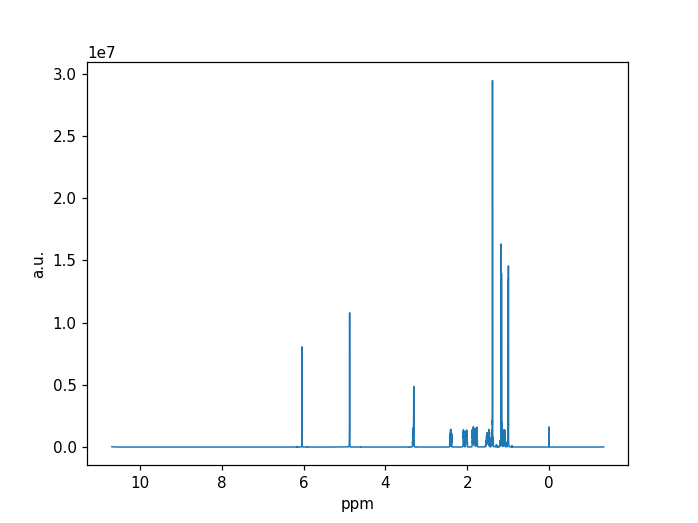

Applied: phase(1.2,  -2.0)


In [12]:
I.Phaser1D(PD1.data)

<IPython.core.display.Javascript object>


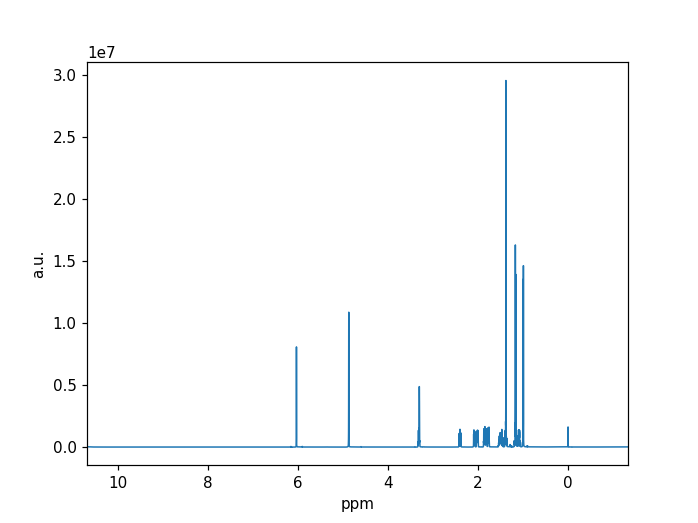

In [11]:
I.Show(PD1.data)

## Save data-set
either as stand alone native SPIKE files, (there are other formats)

In [19]:
PD1.data.save('example1.gs1')

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  8192 real points,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

or as a `csv` text file, - in which case, it is probably better to remove the imaginary part, not useful there.

The file contains some basic informations in addition to the spectral data

In [14]:
PD1.data.real().save_csv('example.csv')

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  8192 real points,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

## Peak-Picker
## Spectra superimposition

### *To come soon !*